#  머신러닝(tf.keras)를 이용한 회귀



## [참고]  시그모이드와 tanh 함수 비교

    ` tanh :  하이퍼볼릭 탄젠트 함수로 삼각함수 중 탄젠트 함수와 연관이 있으면 실수 입력을 받아 -1과 1 사이의 출력을 반환한다.
    ` sigmoid : 0과 1 사이의 출력을 반환한다
    
    ` 
<img src='./imgs/sigmoid_tanh.png' width='400' height='250'>
          
            
첫번째 레이어는 6개의 뉴런을 설정했다.
뉴런이 많을수록 딥러닝 네트워크의 결과값이 좋아지지만, 너무 많이 학습하면 과적합(overfitting)이 될 수 있다.

두번째 레이어는 x 입력값에 대한 하나의 y값만 출력해야 하기 때문에 뉴런 수가 1이다.


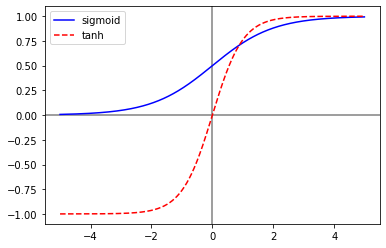

In [6]:

import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

x = np.arange(-5, 5, 0.01)
sigmoid_x = [sigmoid(z) for z in x]
tanh_x = [math.tanh(z) for z in x]

plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(x, sigmoid_x, 'b-', label='sigmoid')
plt.plot(x, tanh_x, 'r--', label='tanh')
plt.legend()
plt.show()

### [ 참고 ] 활성화함수를 sigmoid 함수 외에 다른 함수로 사용하는 이유

<img src='./imgs/sigmoid1.png' width='500'>
<img src='./imgs/sigmoid2.png' width='500'>

### [ 참고 ] 손실함수 mse
<img src='./imgs/mse.png' width='500'>

### [ 참고 ] [SGD :경사하강법](https://twinw.tistory.com/247)  

### [ 참고 ] [epoch](https://m.blog.naver.com/qbxlvnf11/221449297033) 

(한 번의 epoch는 인공 신경망에서 전체 데이터 셋에 대해 forward pass/backward pass 과정을 거친 것을 말함. 즉, 전체 데이터 셋에 대해 한 번 학습을 완료한 상태) 
​

▶ 신경망에서 사용되는 역전파 알고리즘(backpropagation algorithm)은 파라미터를 사용하여 입력부터 출력까지의 각 계층의 weight를 계산하는 과정을 거치는 순방향 패스(forward pass), forward pass를 반대로 거슬러 올라가며 다시 한 번 계산 과정을 거처 기존의 weight를 수정하는 역방향 패스(backward pass)로 나뉩니다. 이 전체 데이터 셋에 대해 해당 과정(forward pass + backward pass)이 완료되면 한 번의 epoch가 진행됐다고 볼 수 있습니다.
​

역전파 알고리즘이 무엇인지 잘 모른다고 하더라도 epoch를 전체 데이터 셋에 대해 한 번의 학습 과정이 완료됐다고 단편적으로 이해하셔도 모델을 학습 시키는 데는 무리가 없습니다.
​

epochs = 40이라면 전체 데이터를 40번 사용해서 학습을 거치는 것입니다.
​

▶ 우리는 모델을 만들 때 적절한 epoch 값을 설정해야만 underfitting과 overfitting을 방지할 수 있습니다.
epoch 값이 너무 작다면 underfitting이 너무 크다면 overfitting이 발생할 확률이 높은 것이죠.

In [1]:
# X : 인구증가율
# Y : 노령인구증가율

X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

In [2]:
# (1) 딥러닝 네트워크를 이용한 회귀
import tensorflow as tf
import numpy as np

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=6, activation='tanh', input_shape=(1,)),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


[ 결과 ]

딥러닝 model은 2개의 Dense 레이어로 구성된다.
첫번째 Dense 레이어는 활성화함수 tanh를 사용한다.



In [3]:
# (2) 딥러닝 네트워크의 학습
model.fit(X, Y, epochs=10)

Train on 16 samples
Epoch 1/10
16/16 [==============================] - 1s 47ms/sample - loss: 255.6778
Epoch 2/10
16/16 [==============================] - 0s 2ms/sample - loss: 123.8692
Epoch 3/10
16/16 [==============================] - 0s 4ms/sample - loss: 10.4720
Epoch 4/10
16/16 [==============================] - 0s 4ms/sample - loss: 9.8380
Epoch 5/10
16/16 [==============================] - 0s 4ms/sample - loss: 9.6776
Epoch 6/10
16/16 [==============================] - 0s 4ms/sample - loss: 9.5918
Epoch 7/10
16/16 [==============================] - 0s 4ms/sample - loss: 9.5469
Epoch 8/10
16/16 [==============================] - 0s 3ms/sample - loss: 9.5216
Epoch 9/10
16/16 [==============================] - 0s 3ms/sample - loss: 9.5026
Epoch 10/10
16/16 [==============================] - 0s 4ms/sample - loss: 9.4847


[ 결과 ]

    X를 입력하면 Y가 정답이 되도록 10번을 학습한다.
    학습을 계속하면 에포크가 9, 10 정도에서 손실이 줄어들지 않는 것은 확인한다.
    손실에 거의 변화가 없다는 것은 학습이 거의 다 된 것이다.

    딥러닝을 포함한 머신러닝에서 충분히 학습했다고 판단하면 학습을 멈춰야 한다.
    학습 데이타에 과적합되어 새로운 데이타가 들어왔을 때 유연하게 대처하지 못할 수도 있다. 

In [4]:
# (3) 딥러닝 네트워크의 Y값 예측
model.predict(X)

array([[15.897602 ],
       [15.670492 ],
       [15.353228 ],
       [15.9261265],
       [15.478645 ],
       [15.909027 ],
       [15.895662 ],
       [15.824675 ],
       [15.676388 ],
       [15.860434 ],
       [15.62772  ],
       [15.847012 ],
       [15.888691 ],
       [15.926048 ],
       [15.682226 ],
       [13.829393 ]], dtype=float32)

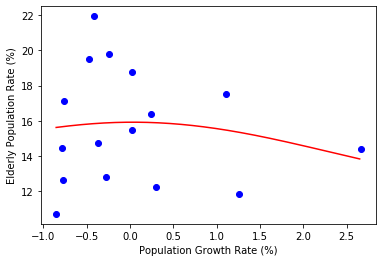

In [5]:
# (4) 딥러닝 네트워크의 회귀선 확인
import matplotlib.pyplot as plt

line_x = np.arange(min(X), max(X), 0.01)
line_y = model.predict(line_x)

plt.plot(line_x,line_y,'r-')
plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

[ 결과 ]

앞에서 했던 다항 회귀에서 구했던 2차 함수와 비슷한 곡선이다. 
딥러닝이 예측한 회귀선이 조금 더 직선에 가까운 완만한 형태이다.

2차함수와 비슷한 성능으로 x 데이타에 대해서 y를 예측한다는 결론을 내릴 수 있다.

이처럼 회귀식을 가정하고 변수를 직접 추정하지 않아도 머신러닝을 이용해 회귀선을 예측할 수 있다.